In [3]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

In [2]:
from tensorflow.keras.utils import to_categorical # 분류분석시 원핫인코딩
from tensorflow.keras.models import Sequential # 모델생성
from tensorflow.keras.layers import Dense, Input
import numpy as np

# 머신러닝/딥러닝 : 데이터의 법칙성을 추출
- 다양한 분야에서 응용 : 글씨인식, 문장분류, 질병진단,... ※ ML/DL의 종류
- 지도학습(독립=입력변수와 종속=타겟=출력변수가 모두 주어졌을 경우) 회귀분석(타겟변수가 연속형) vs 분류분석(multi, binary)
- 비지도학습(입력변수만) 군집화
- 강화학습
※ 지도학습에서의 ML, DL 프로그래밍 방식

1. 데이터 셋 확보(input=입력변수, target=종속변수) 원본 데이터 및 시뮬레이션을 통해 데이터 생성
2. 전처리 스케일 조정 훈련셋(학습셋), 검증셋, 시험셋(테스트셋) 학습 및 평가 가능한 포맷으로 변환
3. 모델 구성
    Sequential 객체 생성 뒤 필요한 층을 add() 함수로 추가
4. 모델 학습과정 설정
    compile() 함수 이용, 손실함수, optimizer, metrics(평가지표)
5. 모델학습시키기 (ft. 학습과정 지켜보기)
    fit() 함수 이용 - 훈련셋입력=독립변수, 훈련셋타겟= 종속변수, 학습횟수, 검증셋
6. 

# 1절 데이터 셋 생성
# 2절 데이터 전처리

In [10]:
# 학습데이터 = 훈련데이터
x_train = np.array([1,2,3,4,5,6,7,8,9]*10)
y_train = np.array([2,4,6,8,10,12,14,16,18]*10)
# 검증데이터
x_val = np.array([1,2,3,4,5,6,7,8,9])
y_val = np.array([2,4,6,8,10,12,14,16,18])
# 테스트셋 = 시험데이터
x_test = np.array([1,2,3,4,5,6,7,8,9])
y_test = np.array([2,4,6,8,10,12,14,16,18])
x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape

((90,), (9,), (9,), (90,), (9,), (9,))

In [11]:
# 인코딩 종류
data = np.array(['a','b','c','d'])
print('원 데이터 :', data)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# le.fit(data)
# labeled_data = le.transform(data)
labeled_data = le.fit_transform(data)
print('라벨인코딩된 데이터 :', labeled_data)
one_hot_encoded_data = to_categorical(labeled_data)
print('원핫인코딩된 데이터 :', one_hot_encoded_data)

원 데이터 : ['a' 'b' 'c' 'd']
라벨인코딩된 데이터 : [0 1 2 3]
원핫인코딩된 데이터 : [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [12]:
# 분류분석을 하기 위해, target을 원핫인코딩(라벨링 전환)
data = np.array([1,2,2,4,2])
print(data)
categorical_one_hot = to_categorical(data)
print('to_categorical을 이용한 원핫인코딩 :\n', categorical_one_hot)
import pandas as pd
get_dumies_one_hot = pd.get_dummies(data)
display('get_dumies를 이용한 원핫인코딩 :', get_dumies_one_hot)
print(type(categorical_one_hot))
print(type(get_dumies_one_hot))


[1 2 2 4 2]
to_categorical을 이용한 원핫인코딩 :
 [[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]


'get_dumies를 이용한 원핫인코딩 :'

,1,2,4
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [15]:
# 분류분석을 위한 target변수 라벨링 전환(=원핫인코딩)
Y_train = to_categorical(y_train, 19)
Y_val   = to_categorical(y_val)
Y_test = to_categorical(y_test)

In [16]:

print('훈련셋 구조:', x_train.shape, Y_train.shape) # 독립변수1개, 타겟변수 19
print('검증셋 구조:', x_val.shape, Y_val.shape)
print('테스트셋 구조:', x_test.shape, Y_test.shape)

훈련셋 구조: (90,) (90, 19)
검증셋 구조: (9,) (9, 19)
테스트셋 구조: (9,) (9, 19)


# 3.모델구성하기

In [17]:
model = Sequential()
model.add(Input(shape=(1,))) # 입력층
model.add(Dense(units=38, activation='sigmoid')) # units출력수, 활성화함수:relu, tanh
model.add(Dense(units=64, activation='elu'))
model.add(Dense(units=32, activation='elu'))
model.add(Dense(units=19, activation='softmax'))
# softmax : 모든 출력결과의 합이 1. 분류분석 마지막 layer(출력층)에서 activation으로
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                76        
                                                                 
 dense_1 (Dense)             (None, 64)                2496      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________


# 4. 모델 학습과정 설정

In [18]:
model.compile(loss="categorical_crossentropy", # 분류분석에서의 손실함수(원핫인코딩有)
             optimizer='sgd',
             metrics=['accuracy']) # 평가지표 : accuracy 

# 5. 모델 학습시키기

In [19]:
hist = model.fit(x_train, Y_train, 
            epochs=100, 
            batch_size=10,
            verbose=2, # 학습결과 출력 옵션 0:출력없음. 1:기본값, 2:에포크별로그상세출력
            validation_data=(x_val, Y_val)
            )

Epoch 1/100
9/9 - 1s - loss: 2.9071 - accuracy: 0.0000e+00 - val_loss: 2.8264 - val_accuracy: 0.0000e+00 - 876ms/epoch - 97ms/step
Epoch 2/100
9/9 - 0s - loss: 2.7938 - accuracy: 0.0000e+00 - val_loss: 2.7296 - val_accuracy: 0.1111 - 47ms/epoch - 5ms/step
Epoch 3/100
9/9 - 0s - loss: 2.7059 - accuracy: 0.1111 - val_loss: 2.6501 - val_accuracy: 0.1111 - 46ms/epoch - 5ms/step
Epoch 4/100
9/9 - 0s - loss: 2.6285 - accuracy: 0.1111 - val_loss: 2.5819 - val_accuracy: 0.1111 - 47ms/epoch - 5ms/step
Epoch 5/100
9/9 - 0s - loss: 2.5669 - accuracy: 0.1111 - val_loss: 2.5230 - val_accuracy: 0.1111 - 46ms/epoch - 5ms/step
Epoch 6/100
9/9 - 0s - loss: 2.5128 - accuracy: 0.1111 - val_loss: 2.4716 - val_accuracy: 0.1111 - 46ms/epoch - 5ms/step
Epoch 7/100
9/9 - 0s - loss: 2.4660 - accuracy: 0.1111 - val_loss: 2.4269 - val_accuracy: 0.1111 - 49ms/epoch - 5ms/step
Epoch 8/100
9/9 - 0s - loss: 2.4205 - accuracy: 0.1111 - val_loss: 2.3886 - val_accuracy: 0.1111 - 46ms/epoch - 5ms/step
Epoch 9/100
9/9 - 

Epoch 69/100
9/9 - 0s - loss: 1.5977 - accuracy: 0.4667 - val_loss: 1.5688 - val_accuracy: 0.3333 - 43ms/epoch - 5ms/step
Epoch 70/100
9/9 - 0s - loss: 1.5770 - accuracy: 0.4111 - val_loss: 1.5568 - val_accuracy: 0.3333 - 42ms/epoch - 5ms/step
Epoch 71/100
9/9 - 0s - loss: 1.5748 - accuracy: 0.4222 - val_loss: 1.5451 - val_accuracy: 0.5556 - 40ms/epoch - 4ms/step
Epoch 72/100
9/9 - 0s - loss: 1.5557 - accuracy: 0.3778 - val_loss: 1.5342 - val_accuracy: 0.5556 - 59ms/epoch - 7ms/step
Epoch 73/100
9/9 - 0s - loss: 1.5493 - accuracy: 0.5000 - val_loss: 1.5232 - val_accuracy: 0.5556 - 52ms/epoch - 6ms/step
Epoch 74/100
9/9 - 0s - loss: 1.5418 - accuracy: 0.4444 - val_loss: 1.5124 - val_accuracy: 0.5556 - 43ms/epoch - 5ms/step
Epoch 75/100
9/9 - 0s - loss: 1.5298 - accuracy: 0.4556 - val_loss: 1.5017 - val_accuracy: 0.6667 - 43ms/epoch - 5ms/step
Epoch 76/100
9/9 - 0s - loss: 1.5278 - accuracy: 0.4444 - val_loss: 1.4913 - val_accuracy: 0.5556 - 39ms/epoch - 4ms/step
Epoch 77/100
9/9 - 0s - 

# 6. 모델 평가하기(모델학습과정 살펴보고, evalute)

In [20]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

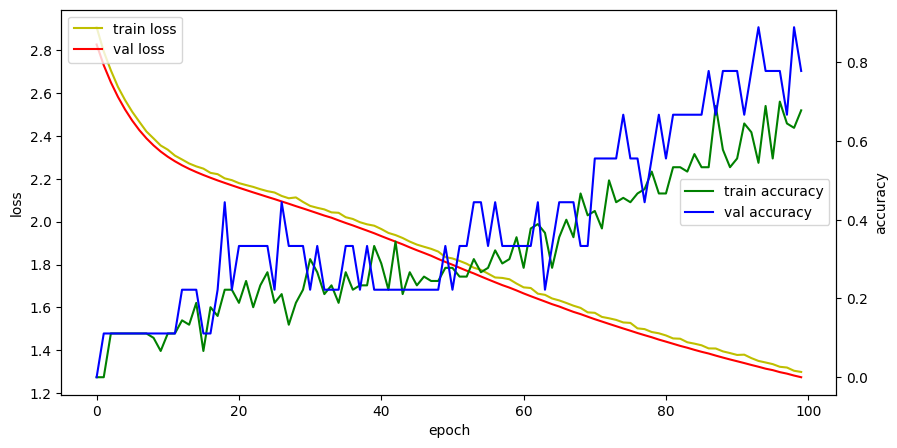

In [21]:
# 모델 학습과정 시각화
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='center right')
plt.show()

In [28]:
# 모델 평가
score = model.evaluate(x_test, Y_test, batch_size=1)

9/9 [==============================] - 0s 5ms/step - loss: 1.2743 - accuracy: 0.7778


In [29]:
score # loss, accuracy

[1.274346947669983, 0.7777777910232544]

In [30]:
print('평가된 loss :', score[0])
print('평가된 accuracy :', score[1]*100, '%')

평가된 loss : 1.274346947669983
평가된 accuracy : 77.77777910232544 %


# 7. 모델 저장하기

In [1]:
# model.save('model/02_deep.h5')
from tensorflow.keras.models import save_model
save_model(model, 'model/02_deep.h5')

NameError: name 'model' is not defined

# 저장된 모델 사용하기

In [2]:
from tensorflow.keras.models import load_model
model2 = load_model('model/02_deep.h5')

In [36]:
model2.predict(np.array([[4]])).argmax()

1/1 [==============================] - 0s 184ms/step


8

In [3]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                76        
                                                                 
 dense_1 (Dense)             (None, 64)                2496      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________


In [6]:
data = np.array([[2], 
                 [3]])
predictions = model2.predict(data)
predictions.argmax(axis=-1)

1/1 [==============================] - 0s 186ms/step


array([4, 6], dtype=int64)

In [9]:
def predict_classes(model,data):
    prediction=model.predcit(data)
    return prediction.argmax(axis=1)

In [10]:
import tensorflow as tf
@tf.function(reduce_retracing=True)
def predict_classes(model, data):
    predictions = model(data, training=False)
    return tf.argmax(predictions, axis=-1)

In [11]:
import numpy as np
input_data = int(input('어떤 데이터를 예측할까요?'))
data = np.array([[input_data]])
print('예측된 분류는', predict_classes(model2, data))

어떤 데이터를 예측할까요?5
예측된 분류는 tf.Tensor([10], shape=(1,), dtype=int64)
